<a href="https://colab.research.google.com/github/Surfox007/ML_freecodecamp_tutorial/blob/main/medical_insurance_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'


In [2]:
from urllib.request import urlretrieve
urlretrieve(medical_charges_url,'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x79fa7d81d290>)

In [4]:
!pip install pandas --quiet

In [5]:
import pandas as pd

In [8]:
medical_df = pd.read_csv('medical.csv')

In [9]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
medical_df.shape

(1338, 7)

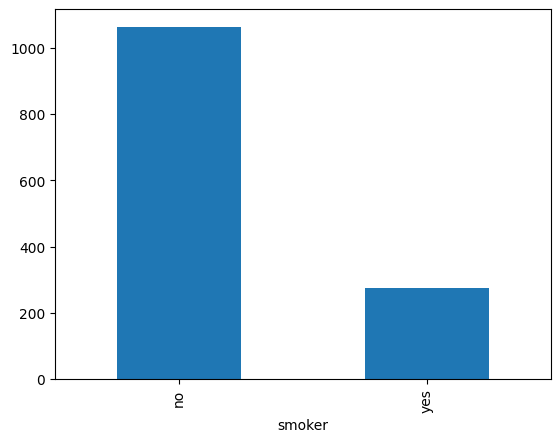

In [11]:
# prompt: plot a bar diagram of medical_df

import matplotlib.pyplot as plt

medical_df.smoker.value_counts().plot(kind='bar')
plt.show()


In [13]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [19]:
!pip install matplotlib seaborn plotly --quiet

In [21]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [24]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [25]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 1.0, 'Distribution of Age')

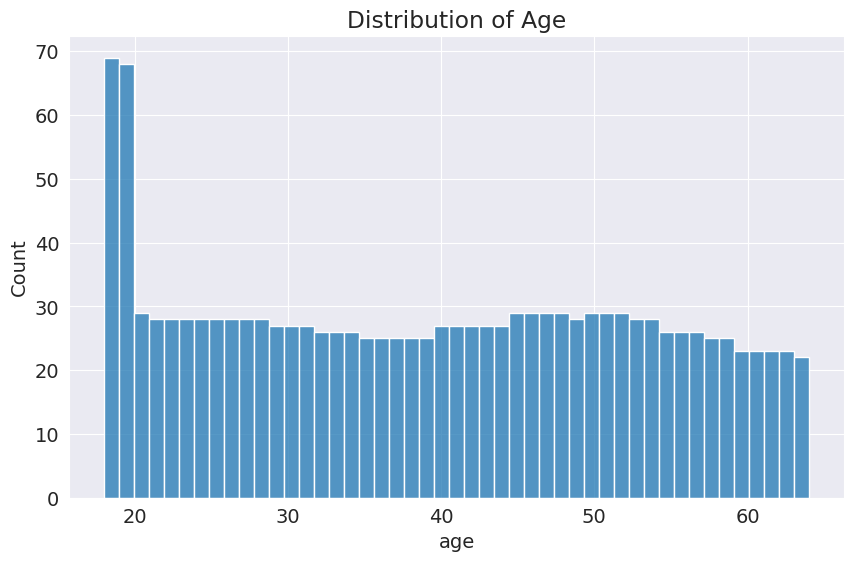

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(medical_df.age, bins=47)
plt.title('Distribution of Age')

In [43]:
fig = px.histogram(medical_df, x='bmi', marginal='box', color_discrete_sequence=['black'], title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

In [44]:
fig = px.histogram(medical_df, x='charges', color='smoker', color_discrete_sequence=['#0000FF', '#FF0000'], title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [47]:
fig = px.histogram(medical_df, x='charges', color='sex', color_discrete_sequence=['sky blue', 'pink'], title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [48]:
medical_df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


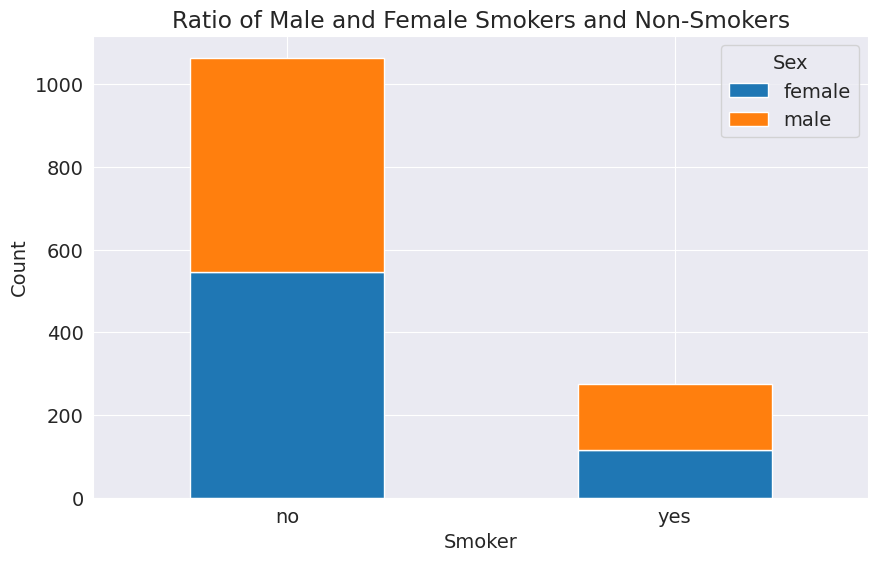

In [51]:
# prompt: plot a figure where it will show the ratio of male and female smokers and non smokers. use a bar diagram. stack the male and female on top of each other and on x axis make two categories for yes and no

import pandas as pd
import matplotlib.pyplot as plt

# Create the cross-tabulation
smoker_sex = pd.crosstab(medical_df['smoker'], medical_df['sex'])

# Plot the stacked bar chart
smoker_sex.plot(kind='bar', stacked=True)
plt.title('Ratio of Smokers and Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Sex')
plt.show()


In [52]:
# prompt: can you use a different diagram to showcase the above data

# Assuming the code you provided is already executed and medical_df is available.

import plotly.express as px

# Create a scatter plot matrix to visualize relationships between multiple variables.
fig = px.scatter_matrix(medical_df,
                        dimensions=['age', 'bmi', 'children', 'charges'],
                        color='smoker',
                        title='Scatter Plot Matrix of Medical Charges Data')
fig.update_traces(diagonal_visible=False)  # Hide the diagonal histograms
fig.show()


In [54]:
# prompt: make a BMI vs charges scatter plot

# Assuming the code you provided is already executed and medical_df is available.
fig = px.scatter(medical_df, x='bmi', y='charges', color='smoker',
                 title='BMI vs. Charges Scatter Plot',
                 hover_data=['age', 'sex', 'children'])
fig.show()


In [55]:
# prompt: show the correlation of medical charges with age

# Assuming the code you provided is already executed and medical_df is available.

fig = px.scatter(medical_df, x='age', y='charges', color='smoker',
                 title='Age vs. Charges Scatter Plot',
                 hover_data=['sex', 'bmi', 'children'])
fig.show()

# Calculate the correlation coefficient
correlation = medical_df['age'].corr(medical_df['charges'])
print(f"The correlation between age and charges is: {correlation}")


The correlation between age and charges is: 0.29900819333064754


In [56]:
# prompt: i only want the correlation value of medical charges with age

correlation = medical_df['age'].corr(medical_df['charges'])
print(f"The correlation between age and charges is: {correlation}")


The correlation between age and charges is: 0.29900819333064754
